##ASSIGNMENT
#Dataset
Assume you are a scientist who is trying to make a propellent and is trying many tests to make an efficient propellent .
<br>
You have performed two tests.
<br>
From the two tests you would like whether this propellent works efficiently or not.
Build your own logistic regression model to decide .
<br>
Text with "DO NOT EDIT THIS CODE" needs to be only run do not edit it


In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math




In [2]:
#load data
data = pd.read_csv('data.txt')
X_train = data.iloc[:, 0:2].to_numpy()
y_train = data.iloc[:, 2].to_numpy()

In [3]:
#plot data to visualise
def plot_data(X,y,pos_label="y=1", neg_label="y=0"):
#positive_label and negative_label refers to classes of y as y can be 0 or 1
#While plotting graph the label parameter will be either positive_label or negative_label so plot both the labels for X
 positive_X = X[y==1]
 negative_X = X[y==0]
 plt.scatter(positive_X[:,0], positive_X[:,1], label=pos_label)
 plt.scatter(negative_X[:,0], negative_X[:,1], label=neg_label)




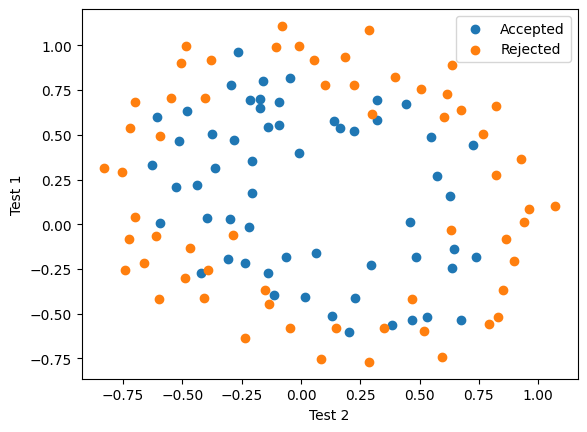

In [4]:
#test
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")


plt.xlabel('Test 2')
plt.ylabel('Test 1')
plt.legend(loc="upper right")
plt.show()


In [5]:
#feature mapping
def map_feature(X1,X2):
  X1=np.atleast_1d(X1)
  X2=np.atleast_1d(X2)
  degree = 6
  out=[]
  for i in range(1,degree+1):
    for j in range(i+1):
      out.append((X1**(i-j) * (X2**j)))
  return np.stack(out, axis=1)




In [6]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (117, 2)
Shape after feature mapping: (117, 27)


In [8]:
# @title DO NOT EDIT THIS CODE
def sigmoid_test(target):
    assert np.isclose(target(3.0), 0.9525741268224334), "Failed for scalar input"
    assert np.allclose(target(np.array([2.5, 0])), [0.92414182, 0.5]), "Failed for 1D array"
    assert np.allclose(target(np.array([[2.5, -2.5], [0, 1]])),
                       [[0.92414182, 0.07585818], [0.5, 0.73105858]]), "Failed for 2D array"
    print('\033[92mTests passed!')

In [7]:
#sigmoid function
def sigmoid(z):
  return 1/(1 + np.exp(-z))




In [9]:
sigmoid_test(sigmoid)


Tests passed!


In [10]:
# @title DO NOT EDIT THIS CODE
def compute_cost_test(target):
    X = np.array([[0, 0, 0, 0]]).T
    y = np.array([0, 0, 0, 0])
    w = np.array([0])
    b = 1
    result = target(X, y, w, b)
    if math.isinf(result):
        raise ValueError("Did you get the sigmoid of z_wb?")

    np.random.seed(17)
    X = np.random.randn(5, 2)
    y = np.array([1, 0, 0, 1, 1])
    w = np.random.randn(2)
    b = 0
    result = target(X, y, w, b)
    assert np.isclose(result, 2.15510667), f"Wrong output. Expected: {2.15510667} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 1, 0, 0])
    w = np.random.randn(3)
    b = 0

    result = target(X, y, w, b)
    assert np.isclose(result, 0.80709376), f"Wrong output. Expected: {0.80709376} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 0,1, 0])
    w = np.random.randn(3)
    b = 3
    result = target(X, y, w, b)
    assert np.isclose(result, 0.4529660647), f"Wrong output. Expected: {0.4529660647} got: {result}. Did you inizialized z_wb = b?"

    print('\033[92mTests passed!')

In [11]:
#computing cost
def compute_cost(X,y,w,b,lambda_=1):
  f = sigmoid(np.dot(X, w) + b)

  return (-1/np.shape(y)[0]) * np.sum(y * np.log(f) + (1 - y) * np.log(1 - f))

In [12]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# test
compute_cost_test(compute_cost)

Cost at test w,b: 11.673
Tests passed!


In [13]:
#compute regularised cost
def compute_cost_reg(X, y, w, b, lambda_ = 1):
  f = sigmoid(np.dot(X, w) + b)



  return compute_cost(X, y, w, b, lambda_) + (lambda_ / (2*np.shape(y)[0]))*np.sum(w**2)

In [14]:
# @title DO NOT EDIT THIS CODE
def compute_cost_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(3)
    b = 0.4
    X = np.random.randn(6, 3)
    y = np.array([0, 1, 1, 0, 1, 1])
    lambda_ = 0.1
    expected_output = target(X, y, w, b, lambda_)

    assert np.isclose(expected_output, 0.5469746792761936), f"Wrong output. Expected: {0.5469746792761936} got:{expected_output}"

    w = np.random.randn(5)
    b = -0.6
    X = np.random.randn(8, 5)
    y = np.array([1, 0, 1, 0, 0, 1, 0, 1])
    lambda_ = 0.01
    output = target(X, y, w, b, lambda_)
    assert np.isclose(output, 1.2608591964119995), f"Wrong output. Expected: {1.2608591964119995} got:{output}"

    w = np.array([2, 2, 2, 2, 2])
    b = 0
    X = np.zeros((8, 5))
    y = np.array([0.5] * 8)
    lambda_ = 3
    output = target(X, y, w, b, lambda_)
    expected = -np.log(0.5) + 3. / (2. * 8.) * 20.
    assert np.isclose(output, expected), f"Wrong output. Expected: {expected} got:{output}"

    print('\033[92mAll tests passed!')

In [15]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularised cost :", cost)

#test
compute_cost_reg_test(compute_cost_reg)

Regularised cost : 0.6631463327835967
All tests passed!


In [16]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_test(target):
    np.random.seed(1)
    X = np.random.randn(7, 3)
    y = np.array([1, 0, 1, 0, 1, 1, 0])
    test_w = np.array([1, 0.5, -0.35])
    test_b = 1.7
    dj_db, dj_dw  = target(X, y, test_w, test_b)

    assert np.isclose(dj_db, 0.28936094), f"Wrong value for dj_db. Expected: {0.28936094} got: {dj_db}"
    assert dj_dw.shape == test_w.shape, f"Wrong shape for dj_dw. Expected: {test_w.shape} got: {dj_dw.shape}"
    assert np.allclose(dj_dw, [-0.11999166, 0.41498775, -0.71968405]), f"Wrong values for dj_dw. Got: {dj_dw}"

    print('\033[92mTests passed!')

In [17]:
#compute gradient
def compute_gradient(X, y, w, b, lambda_=None):
  f = sigmoid(np.dot(X, w) + b)
  dj_dw = (1/np.shape(y)[0])*np.dot(X.T, (f - y))
  dj_db = (1/np.shape(y)[0])*np.sum(f - y)

  return dj_db,dj_dw

In [18]:
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# test
compute_gradient_test(compute_gradient)

dj_db at test_w: -0.4871794871430757
dj_dw at test_w: [-0.008236697431387122, -0.08627568375931736]
Tests passed!


In [19]:
#compute regularised gradient
def compute_gradient_reg(X, y, w, b, lambda_=1):
  dj_db, dj_dw = compute_gradient(X, y, w, b)
  dj_dw += (lambda_/np.shape(y)[0])*w
  return dj_db,dj_dw

In [20]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(5)
    b = 0.2
    X = np.random.randn(7, 5)
    y = np.array([0, 1, 1, 0, 1, 1, 0])
    lambda_ = 0.1
    expected1 = (-0.1506447567869257, np.array([ 0.19530838, -0.00632206,  0.19687367,  0.15741161,  0.02791437]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)

    assert np.isclose(dj_db, expected1[0]), f"Wrong dj_db. Expected: {expected1[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected1[1]), f"Wrong dj_dw. Expected: {expected1[1]} got: {dj_dw}"


    w = np.random.randn(7)
    b = 0
    X = np.random.randn(7, 7)
    y = np.array([1, 0, 0, 0, 1, 1, 0])
    lambda_ = 0
    expected2 = (0.02660329857573818, np.array([ 0.23567643, -0.06921029, -0.19705212, -0.0002884 ,  0.06490588,
        0.26948175,  0.10777992]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)
    assert np.isclose(dj_db, expected2[0]), f"Wrong dj_db. Expected: {expected2[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected2[1]), f"Wrong dj_dw. Expected: {expected2[1]} got: {dj_dw}"

    print('\033[92mTests passed!')

In [21]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}" )
#test
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.07539347940593889
Tests passed!


In [22]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.
lambda_ = 0.01
iterations = 1000
alpha = 0.01
def gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_):
  J_history = [compute_cost_reg(X = X_mapped, y = y_train, w = initial_w, b = initial_b, lambda_ = lambda_)]
  for iter in range(iterations):
    dj_db, dj_dw = compute_gradient_reg(X = X_mapped, y = y_train, w = initial_w, b = initial_b, lambda_ = lambda_)
    initial_b -= dj_db
    initial_w -= dj_dw
    J_history.append(compute_cost_reg(X = X_mapped, y = y_train, w = initial_w, b = initial_b, lambda_ = lambda_))
  w = initial_w
  b = initial_b
  return w, b, J_history, _

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)


In [23]:
#plot decision boundary
def plot_decision_boundary(w,b,X,y):
  test1_min, test1_max = X[:, 0].min(), X[:, 0].max()
  test2_min, test2_max = X[:, 1].min(), X[:, 1].max()
  #generating points
  t1, t2 = np.linspace(test1_min, test1_max, 50), np.linspace(test2_min, test2_max, 50)
  #predicting for whole grid
  f = np.zeros((len(t1), len(t2)))
  for i in range(len(t1)):
    for j in range(len(t2)):
      f[i, j] = sigmoid(np.dot(map_feature(t1[i], t2[j]), w) + b)
  plt.contour(t1, t2, f.T, [0.5])
  plot_data(X, y, 'Accepted', 'Rejected')
  plt.xlabel('Test 2')
  plt.ylabel('Test 1')
  plt.legend(loc = 'upper right')
  plt.title('Decision Boundary')
  plt.show()





<ipython-input-23-abdf57e41c45>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[i, j] = sigmoid(np.dot(map_feature(t1[i], t2[j]), w) + b)


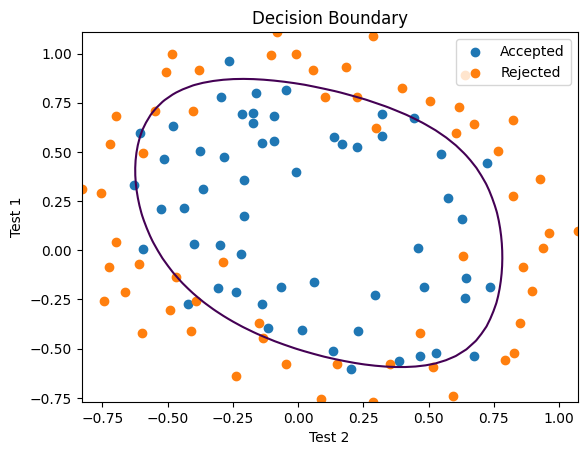

In [24]:
plot_decision_boundary(w, b, X_mapped, y_train)

In [25]:
#predict your training model
def predict(X, w, b):
  m,n=X.shape
  p=np.zeros(m)
  p = sigmoid(np.dot(X, w) + b) > 0.5




  return p

In [26]:
p = predict(X_mapped, w, b)

print('Accuracy of training model: %f'%(np.mean(p == y_train) * 100))

Accuracy of training model: 84.615385
